In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
def imshow(title="", image=None, size=10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = w / h

    plt.figure(figsize=(size * aspect_ratio, size))

    # Check if the image is grayscale
    if len(image.shape) == 2:  # Grayscale images have only 2 dimensions
        plt.imshow(image, cmap="gray")  # Use the 'gray' colormap for grayscale images
    else:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Convert color images to RGB

    plt.title(title)
    plt.axis('off')  # Optional: Remove axis
    plt.show()

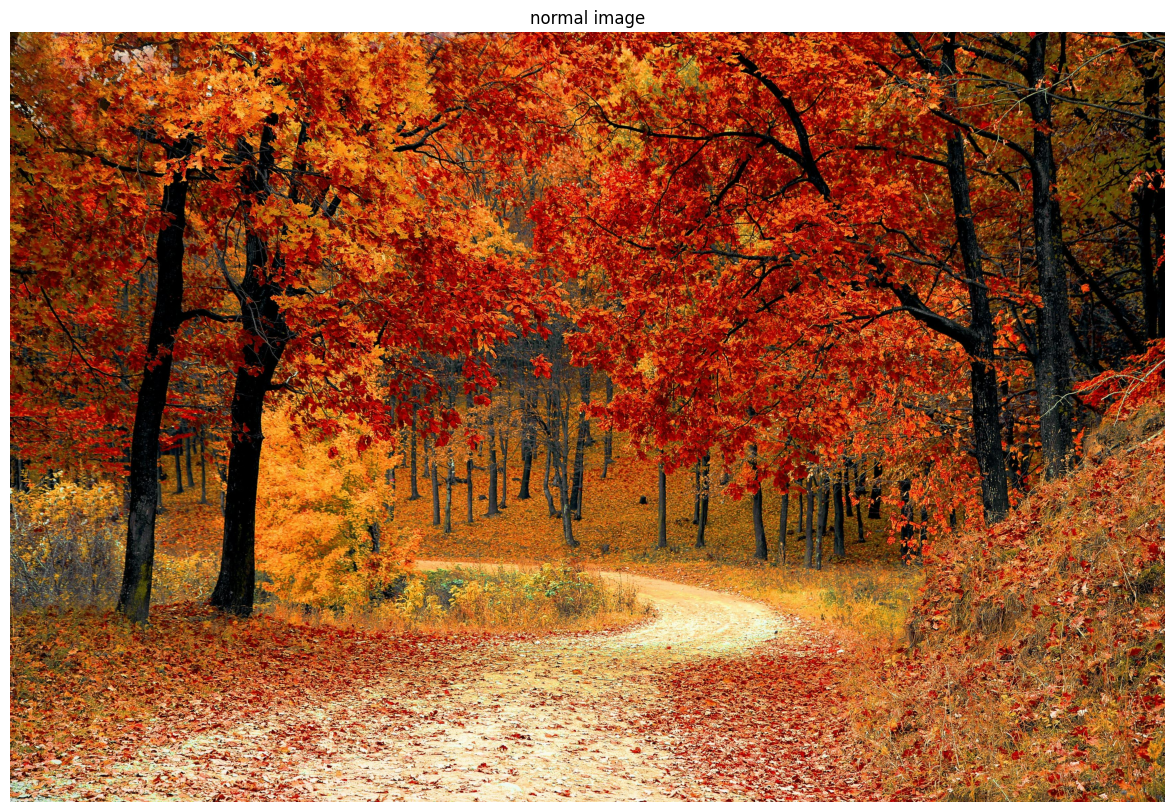

In [113]:
image_path='/content/drive/MyDrive/MyDataSet/Class1/nature1.jpg'

image=cv.imread(image_path)
imshow("normal image",image)


In [114]:
# TASK 12

In [115]:
# Finding Contours as per usual

In [116]:
image_path='/content/drive/MyDrive/MyDataSet/SCLASS/shape.jpg'

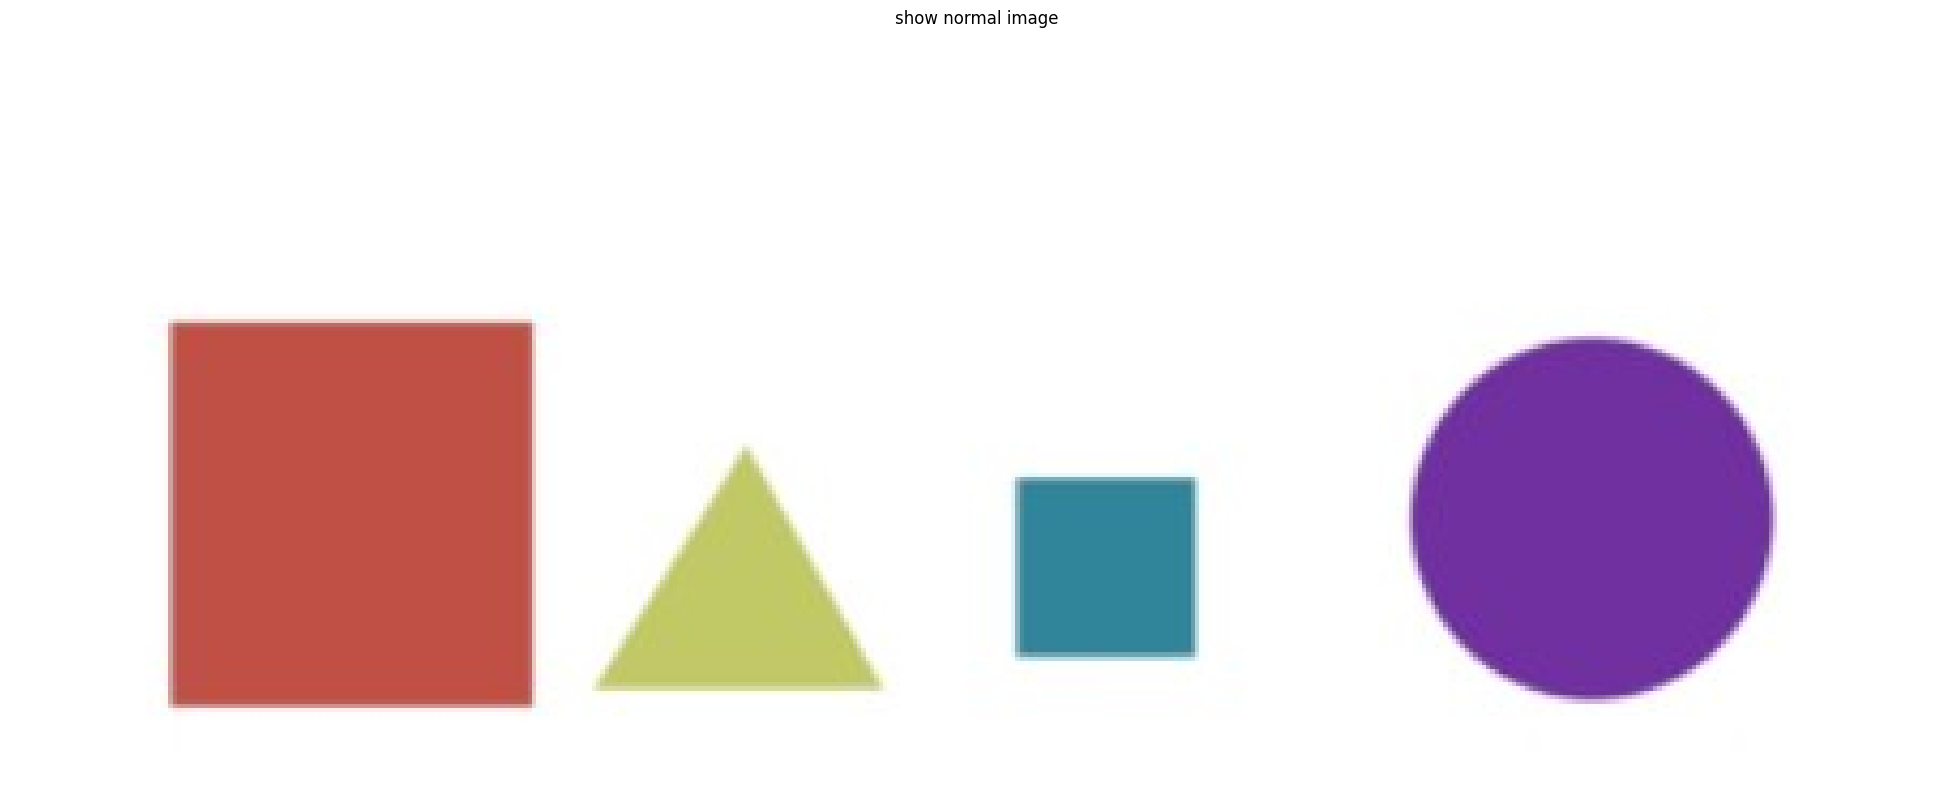

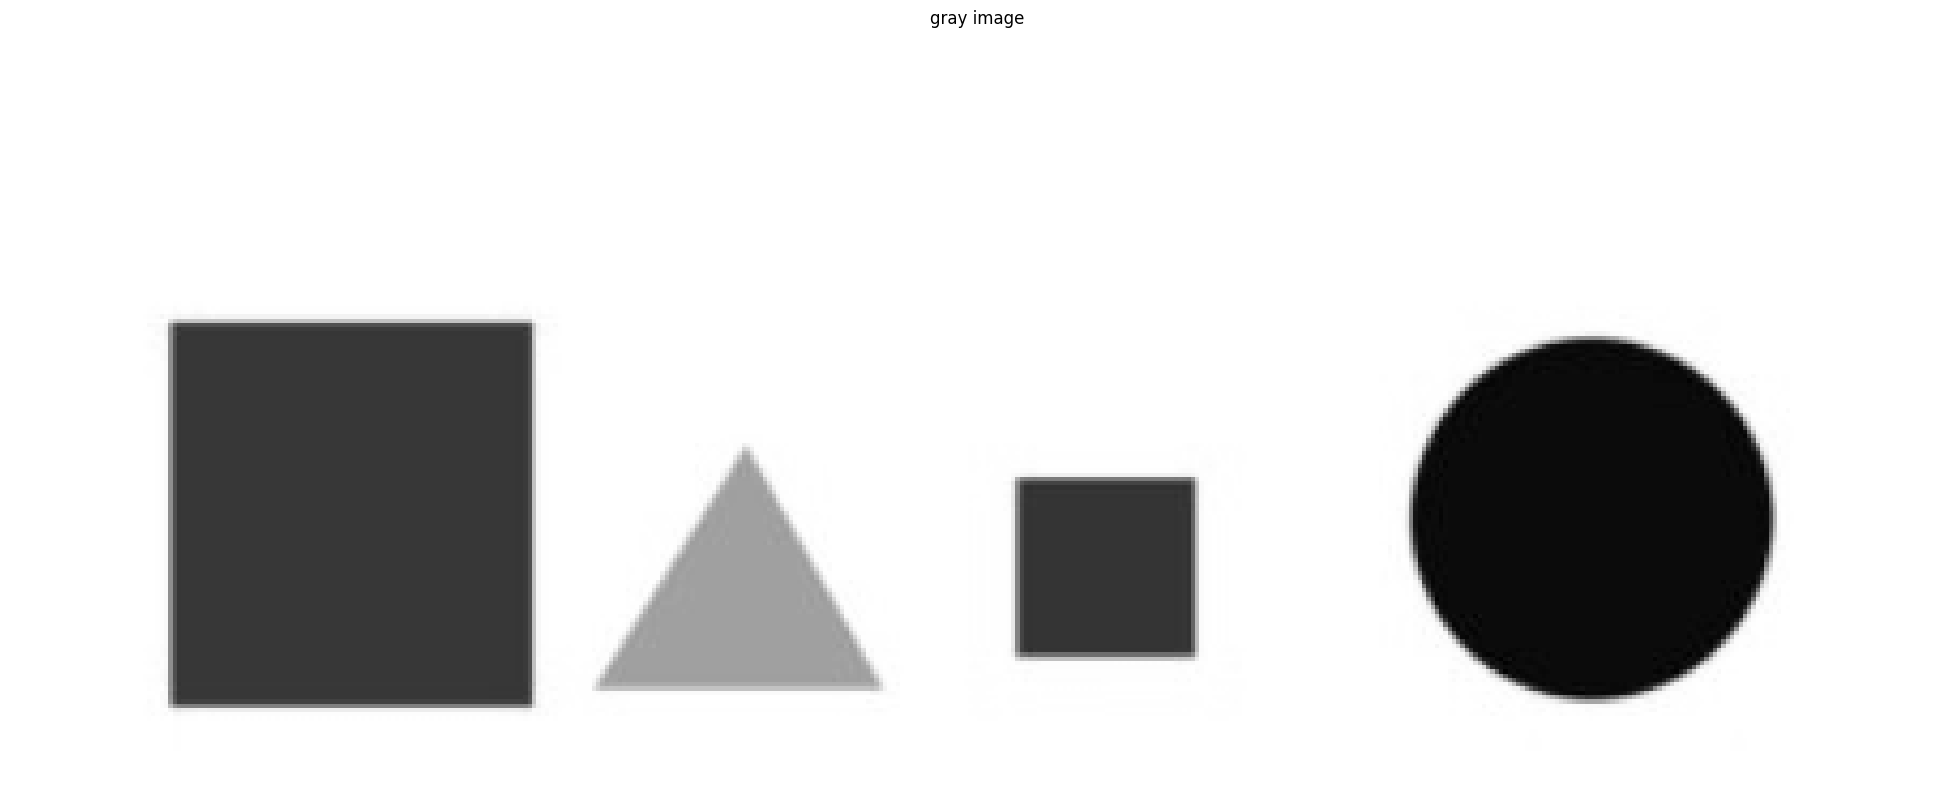

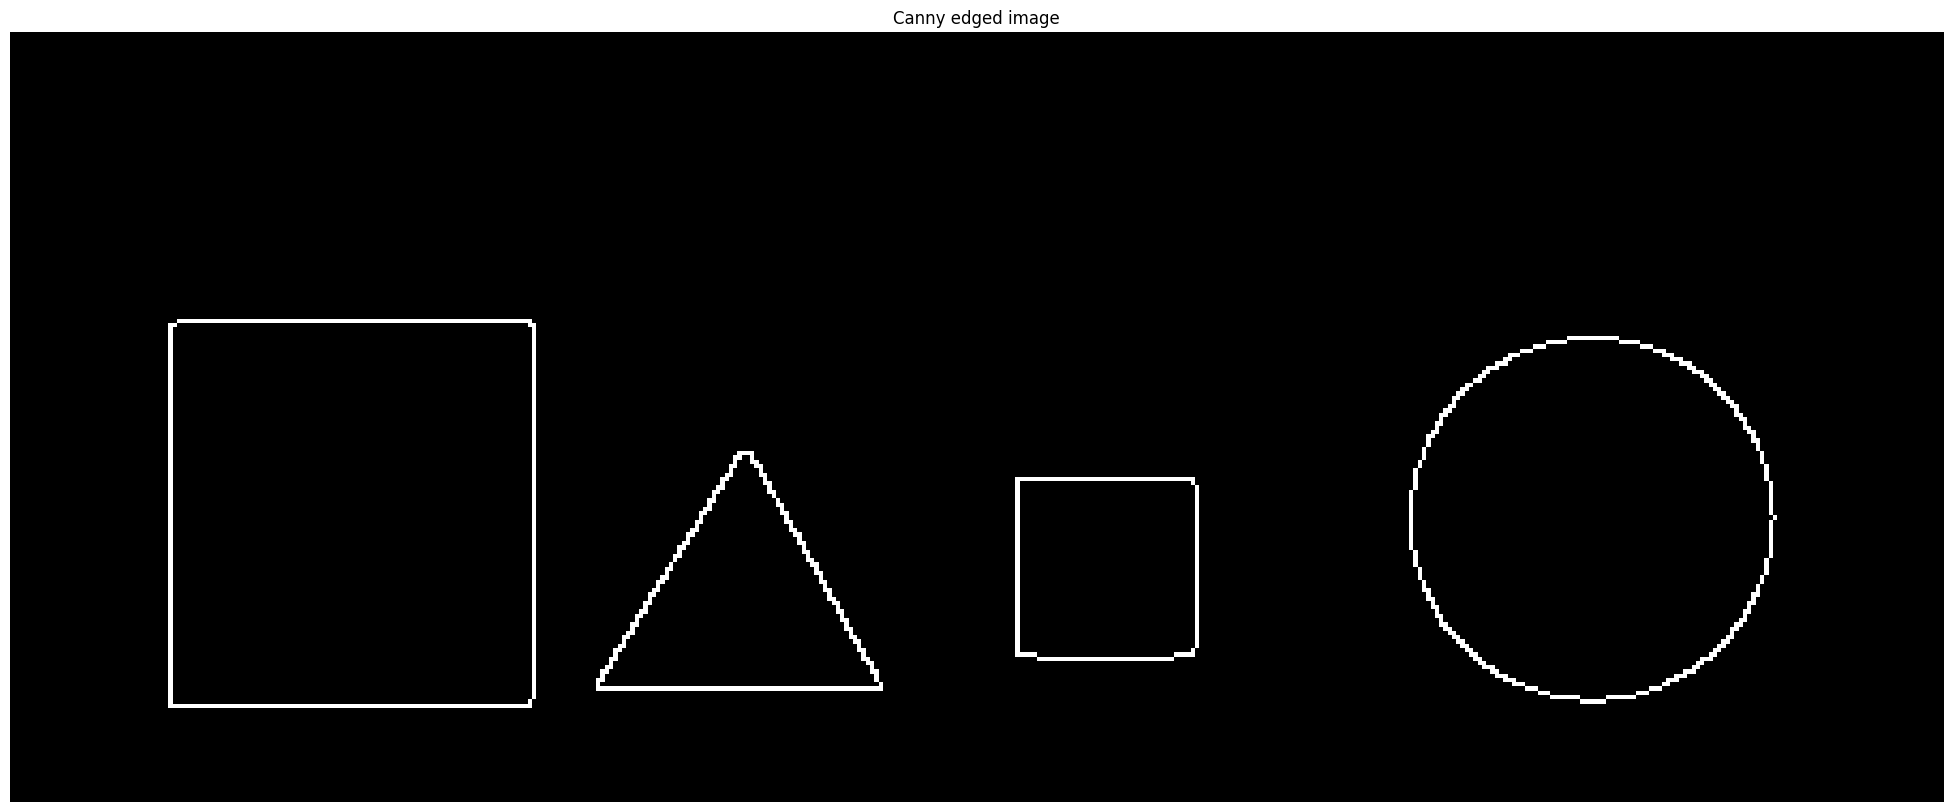

no of contours detected 8


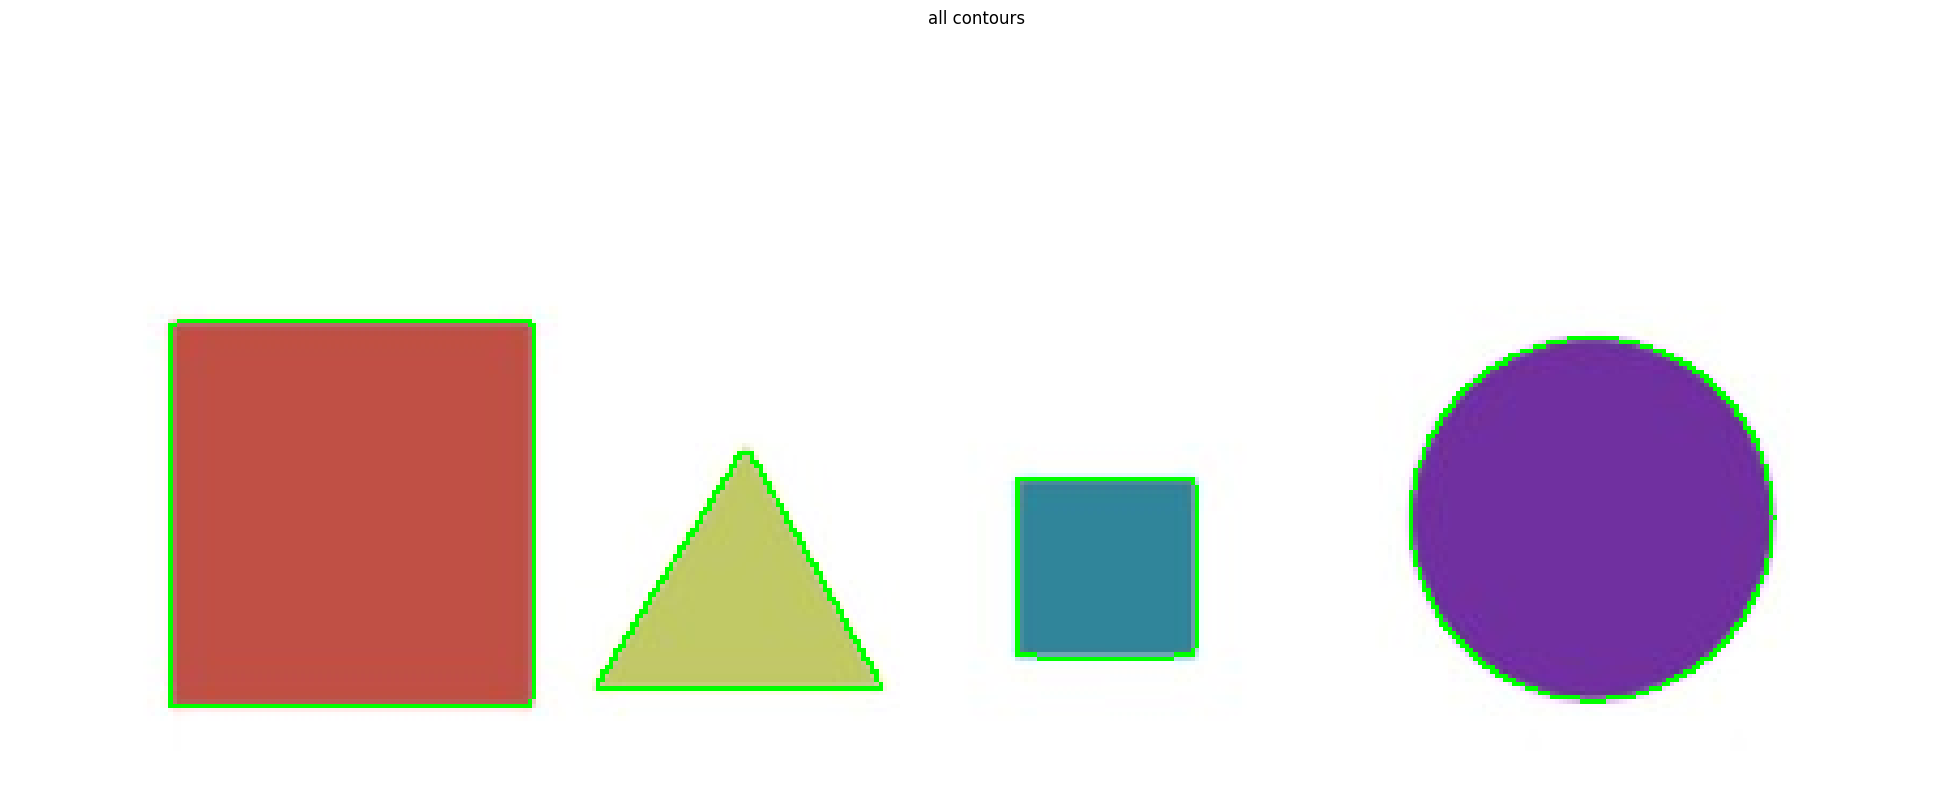

In [117]:
image=cv.imread(image_path)


# show the notmal image
imshow("show normal image",image)

#gryscale the image
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
imshow("gray image",gray)

# create the edges
edged=cv.Canny(gray,20,200)
imshow("Canny edged image",edged)

#find the contours and print the image
contours,heirarchy=cv.findContours(edged,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print("no of contours detected",len(contours))

cv.drawContours(image,contours,-1,(0,255,0),-1)
imshow("all contours",image)

In [118]:
def get_contour_area(contours):
  all_areas=[]
  for cnt in contours:
    area=cv.contourArea(cnt)
    all_areas.append(area)
  return all_areas

Contor Areas before sorting...
[1749.0, 1751.0, 1882.5, 1944.5, 5576.5, 5646.5, 7643.5, 7646.5]
Contor Areas after sorting...
[7646.5, 7643.5, 5646.5, 5576.5, 1944.5, 1882.5, 1751.0, 1749.0]


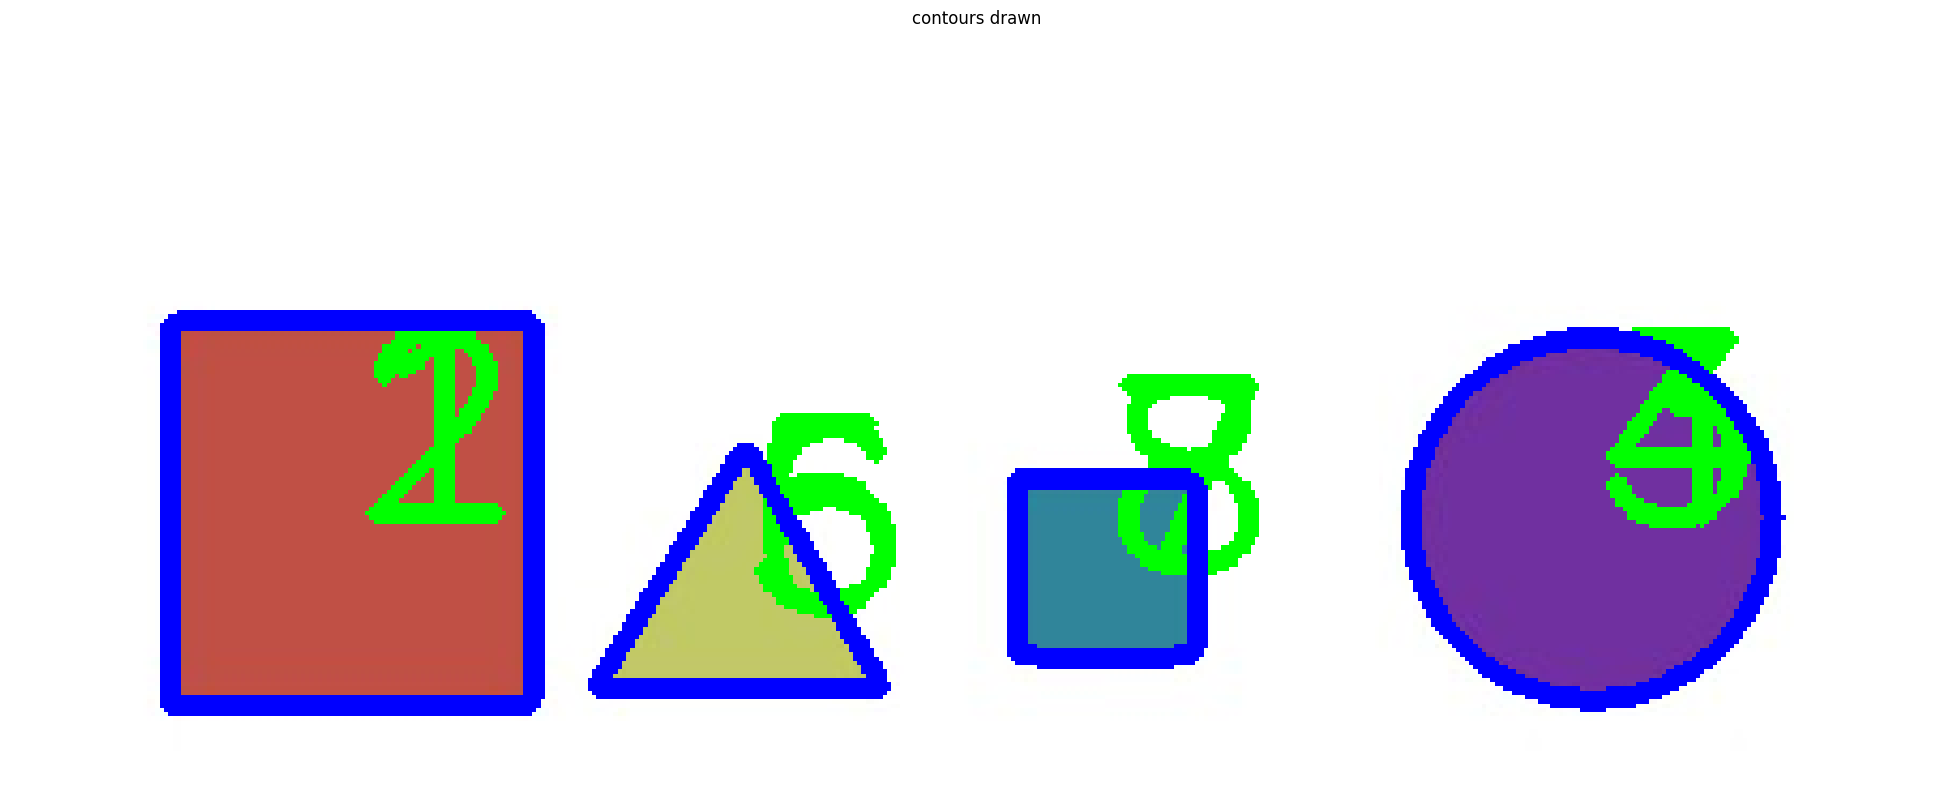

In [119]:
image=cv.imread(image_path)

# Let's print the areas of the contours before sorting
print("Contor Areas before sorting...")
print(get_contour_area(contours))

# Sort contours large to small by area
sorted_contours=sorted(contours,key=cv.contourArea,reverse=True)

# Let's print the areas of the contours after sorting
print("Contor Areas after sorting...")
print(get_contour_area(sorted_contours))


# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.putText(image, str(i+1), (cx, cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow("contours drawn",image)

In [120]:
# Define some functions we'll be using

In [121]:
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

In [122]:
# Approximating Contours using ApproxPolyDP

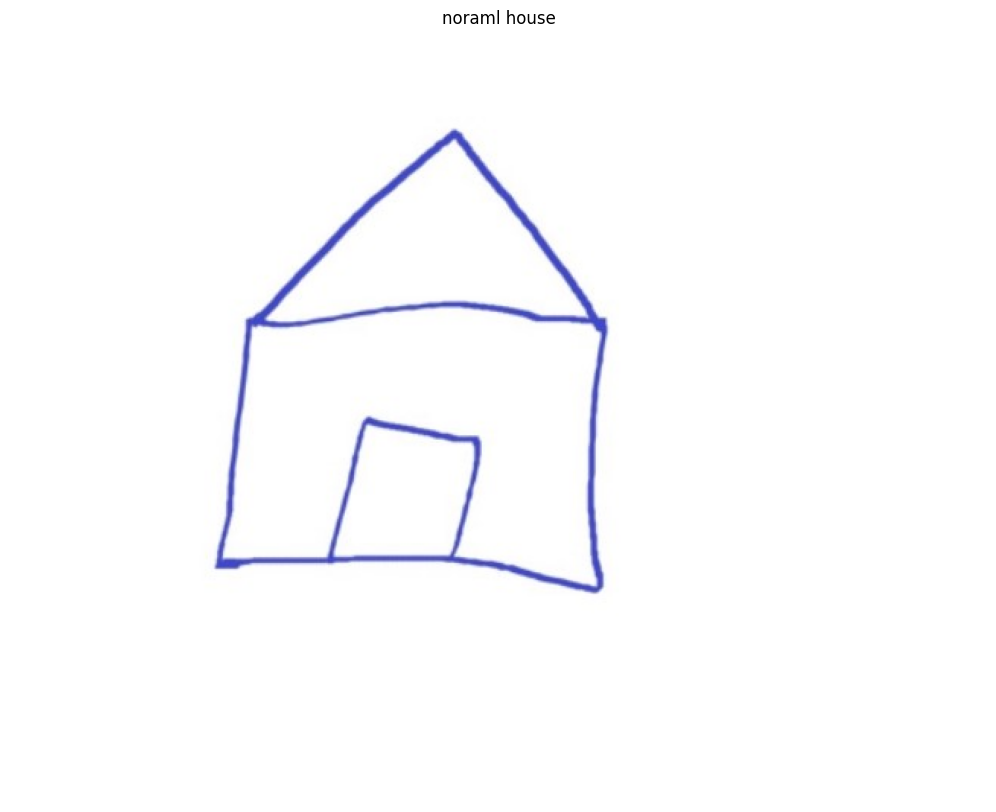

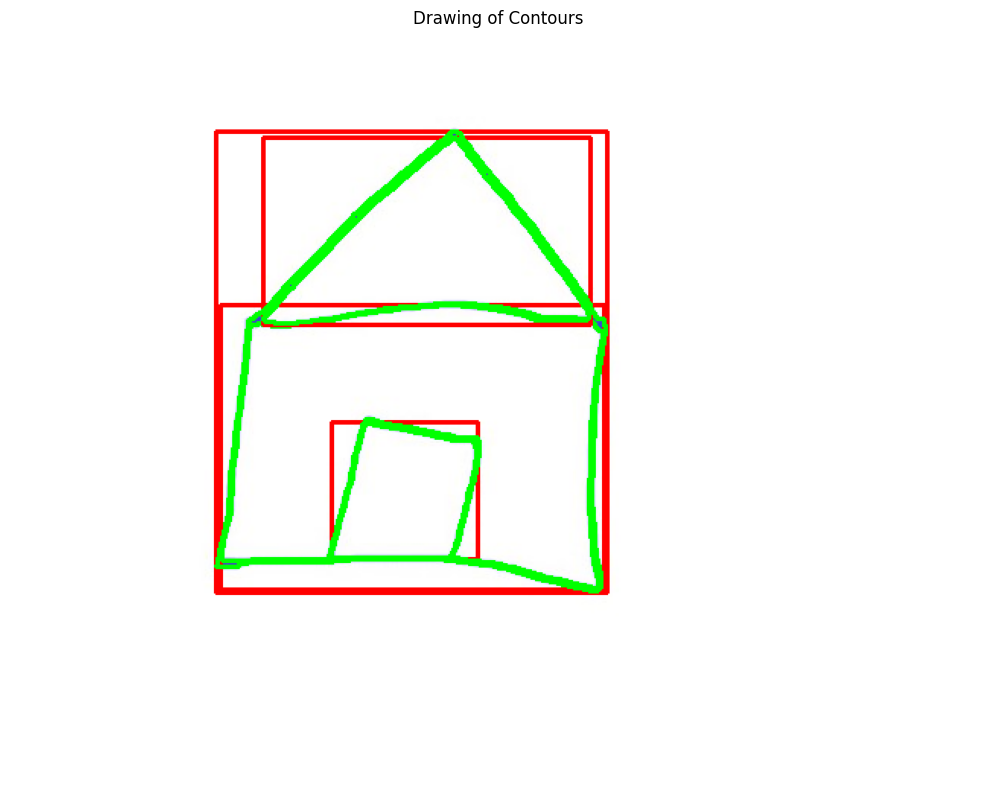

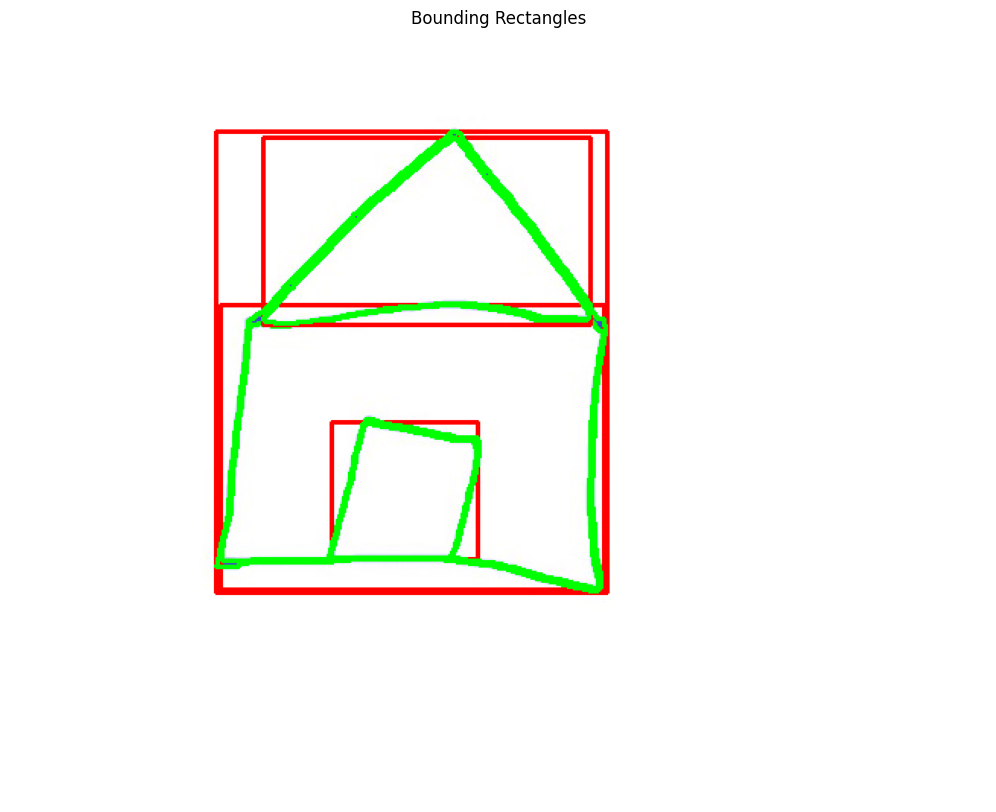

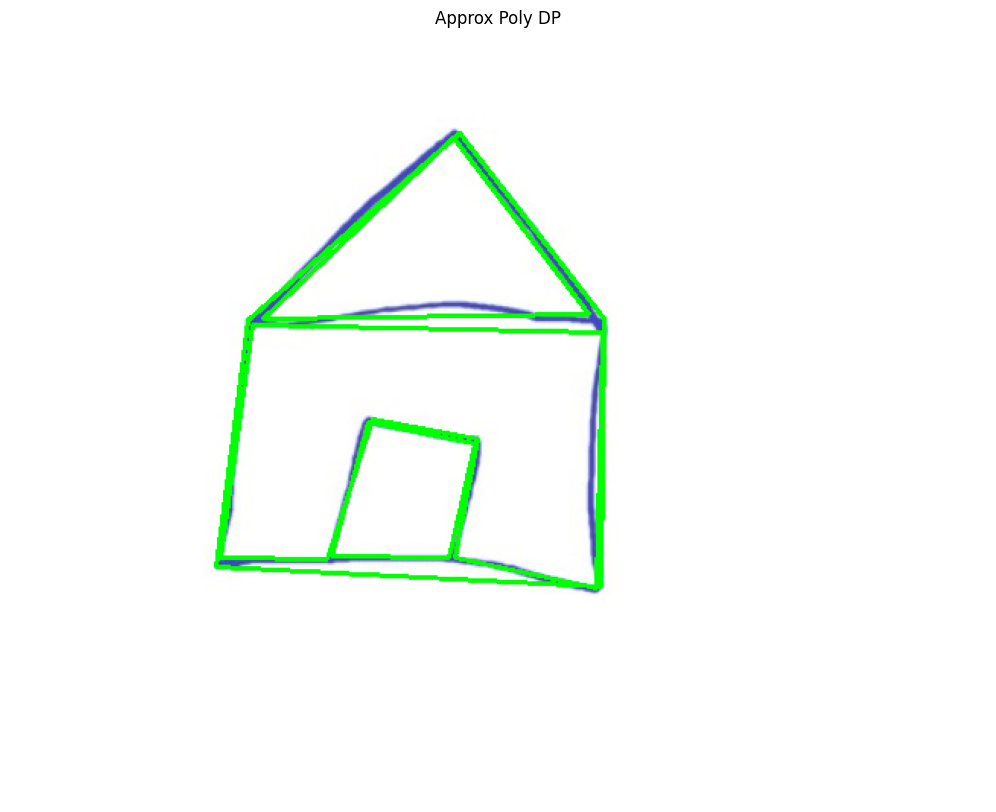

In [123]:
image_path='/content/drive/MyDrive/MyDataSet/SCLASS/house.jpg'

image=cv.imread(image_path)
imshow("noraml house",image)

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)


# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

# Iterate through each contour
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

imshow('Drawing of Contours', image)
imshow('Bounding Rectangles', image)
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow('Approx Poly DP', copy)

In [124]:
#convex hull